# Notebook for investigating magnetic unblocking history for slow cooling igneous rocks

In [1]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import Julian_year
from scipy.optimize import minimize
%config InlineBackend.figure_format='retina'

## discrete temp-time-relaxation evaluation from Pullaiah et al., 1975

Neel theory: the relaxation time of a given grain with volume v, microscopic coercive force hc, spontaneous magnetization js, put at temperature T, shall have a characteristic relaxation time of $\tau$ that follows: 

$$\tau = \frac{1}{C}exp(\frac{vh_{c}j_{s}}{2kT})$$

Therefore, given such a grain with known composition (e.g. magnetite or hematite), with known volume, assuming spherical shape, the follow relationship between characteristic relaxation time says:

$$\frac{T_1 ln[\tau _1C]}{j_s [T_1]h_c [T_1]} = \frac{T_2 ln[\tau _2C]}{j_s [T_2]h_c [T_2]}$$

Here both js (spontaneous magnetization) and hc (microscopic coercivity) are functions of temperature. 

For uniaxial anisotropy magnetite, $h_c \sim j_s$; for magnetocrystalline anisotropy hematite,  $h_c \sim j_s^3$. Therefore:
$$\frac{T_1 ln[\tau _1C]}{j_s[T_1] ^2} = \frac{T_2 ln[\tau _2C]}{j_s[T_2] ^2}    (magnetite)$$ 

$$\frac{T_1 ln[\tau _1C]}{j_s[T_1] ^4} = \frac{T_2 ln[\tau _2C]}{j_s[T_2] ^4}    (hematite)$$

And the temperature dependence of js for magnetite is described by: 
$$\frac{M_{s}[T]}{M_{s}[T_{0}]}=\left | \frac{T_{c}-T}{T_c-T_0} \right |^{\gamma }$$
Where $\gamma$ is derived from fitting experimental data - about 0.38 for magnetite. 

- Pullaiah, G., Irving, E., Buchan, K. L., & Dunlop, D. J. (1975). Magnetization changes caused by burial and uplift. Earth and Planetary Science Letters, 28(2), 133-143.

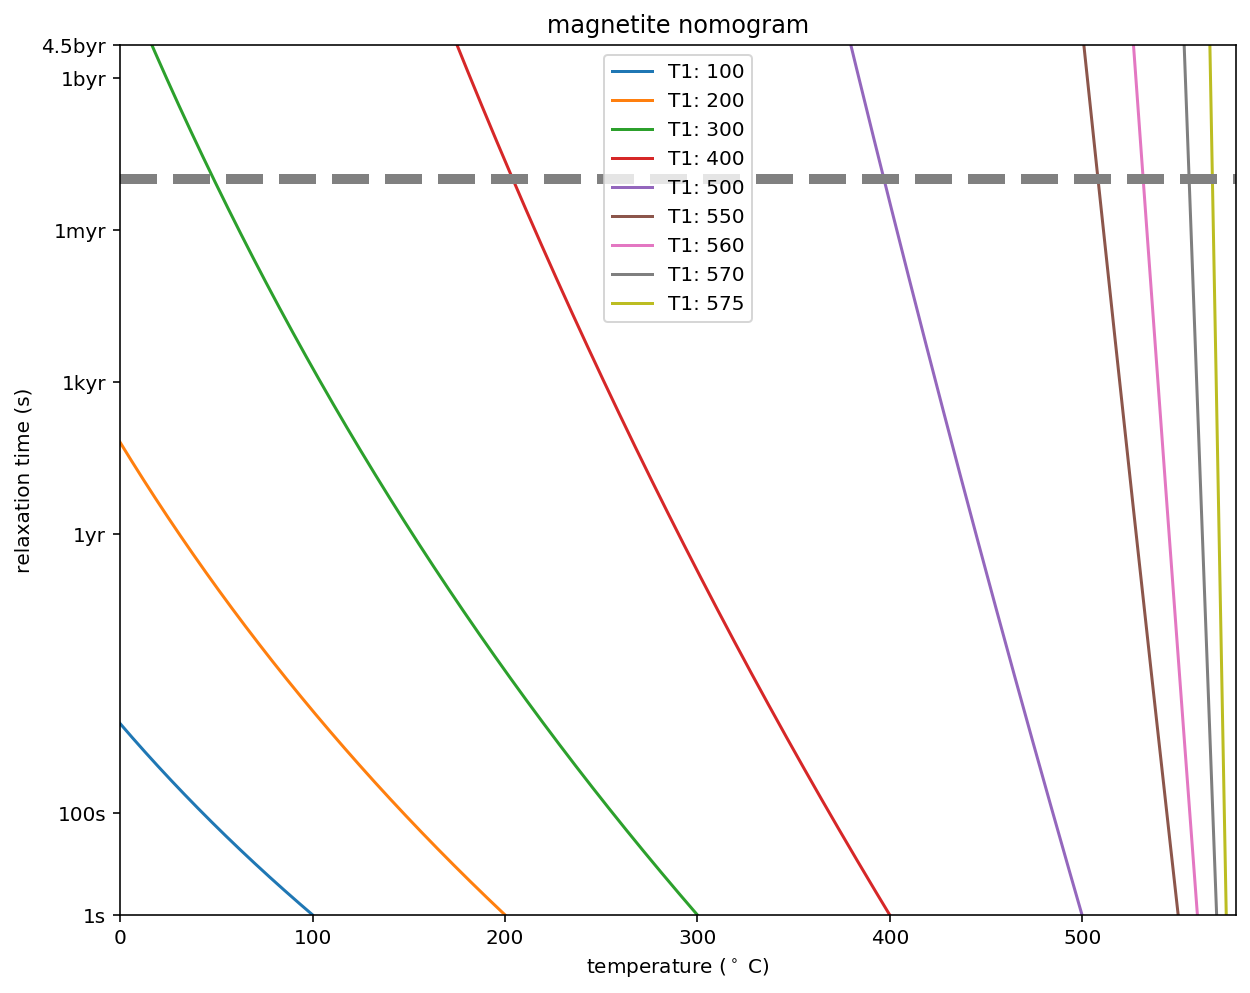

In [2]:
# initiallize a bunch of 1s relaxation time scenario for magnetite
fast_relax_temp = [i + 273 for i in[100, 200, 300, 400, 500, 550, 560, 570, 575]] # in celcius [100, 200, 300, 400, 500, 550] 
C = 1e10 # attempt frequency
tau1 = 1 # 100s
mag_js = 480000 #A/m for magnetite

plt.figure(figsize=(10,8))
for T1 in fast_relax_temp:
    T2_list = np.linspace(273, T1, 1000)
    tau2_list = []
    T1_js = mag_js*(T1*np.log((580+273)/T1)/273/np.log((580+273)/273))**(0.5)
    for T2 in T2_list:
        T2_js = mag_js*(T2*np.log((580+273)/T2)/273/np.log((580+273)/273))**(0.5)

        tau2_list.append(np.exp(T1*np.log(tau1*C)*T2_js**2/T1_js**2/T2)/C)
    plt.plot(T2_list-273.15, tau2_list, label = 'T1: '+str(T1-273))
    
plt.plot([0,600], [1e7*Julian_year, 1e7*Julian_year], '--', color = 'grey', linewidth=5)
plt.xlabel('temperature ($^\circ$ C)')
plt.ylabel('relaxation time (s)')
plt.legend()
plt.xlim(0, 580)
plt.yscale('log')
plt.yticks(ticks=[1, 100, Julian_year, 1000*Julian_year, 1e6*Julian_year, 1e9*Julian_year, 4.5e9*Julian_year], 
           labels=['1s', '100s', '1yr', '1kyr', '1myr', '1byr', '4.5byr'])
plt.ylim(1, 4.5e9*Julian_year)
plt.title('magnetite nomogram')
# plt.savefig('../figure/magnetite_nomogram.pdf', bbox_inches='tight')
plt.show()

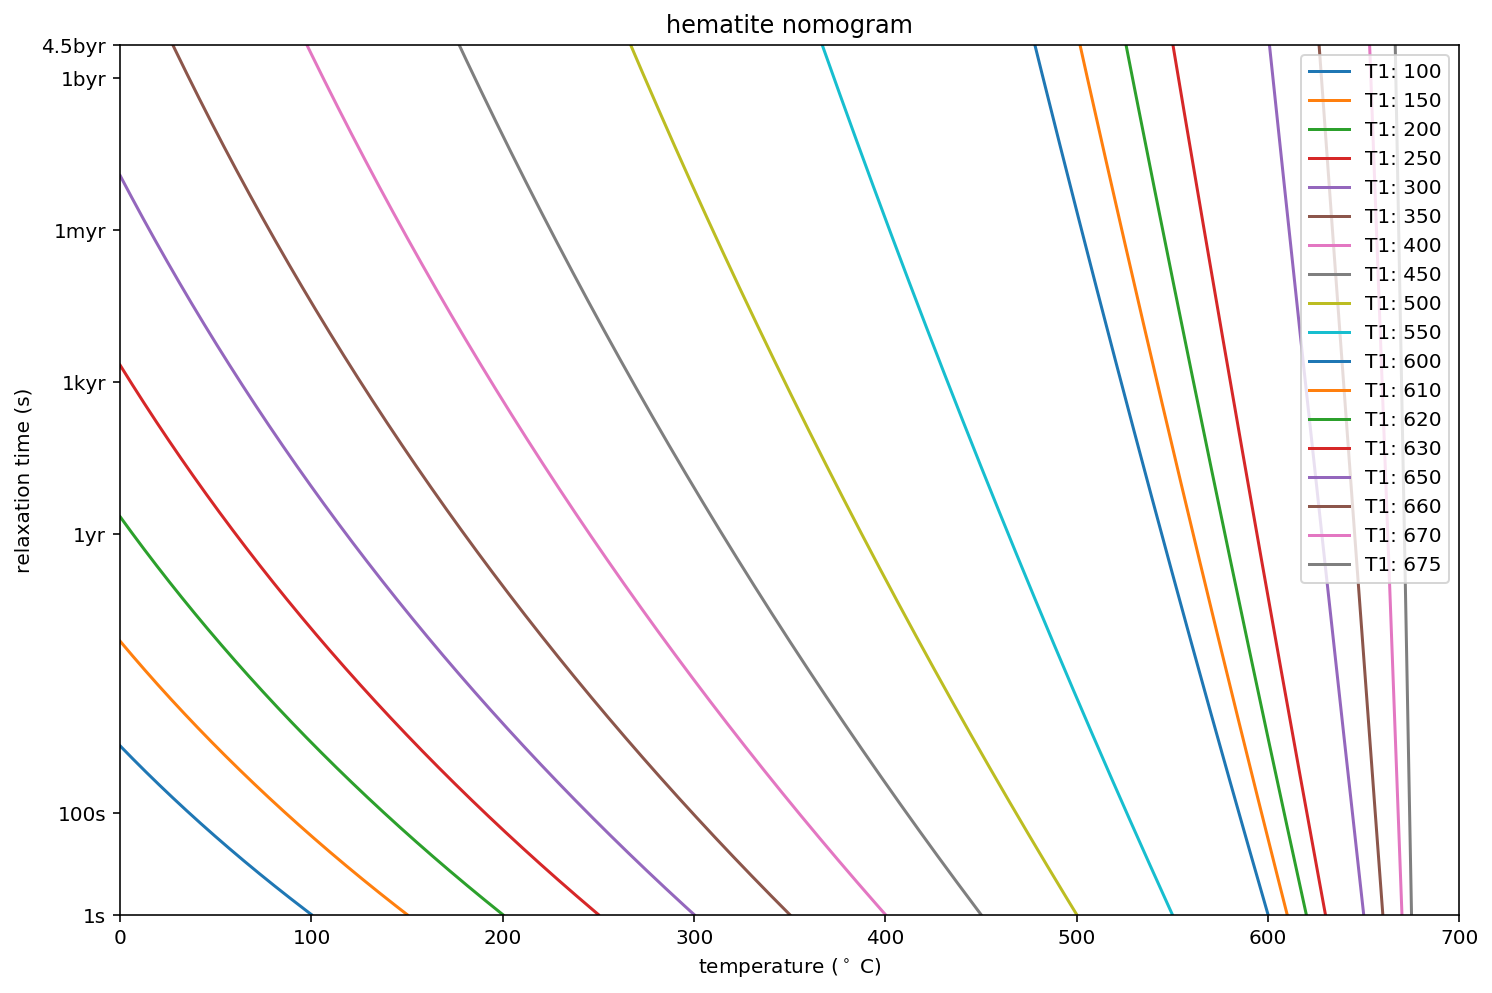

In [3]:
# initiallize a bunch of 1s relaxation time scenario for magnetite
fast_relax_temp = [i + 273 for i in[100, 150, 200, 250, 300, 350, 400, 
                                       450, 500, 550, 600, 610, 620, 630, 
                                       650, 660, 670, 675]] # in celcius 
C = 1e10 # attempt frequency
tau1 = 1 # 1s
hem_js = 2000 #A/m for hematite

plt.figure(figsize=(12,8))
for T1 in fast_relax_temp:
    T2_list = np.linspace(273, T1, 1000)
    tau2_list = []
    T1_js = (T1*np.log((680+273)/T1)/273/np.log((680+273)/273))**(1/4)
    for T2 in T2_list:
        T2_js = (T2*np.log((680+273)/T2)/273/np.log((680+273)/273))**(1/4)

        tau2_list.append(np.exp(T1*np.log(tau1*C)*T2_js**4/T1_js**4/T2)/C)
    plt.plot(T2_list-273, tau2_list, label = 'T1: '+str(T1-273))
    
plt.xlabel('temperature ($^\circ$ C)')
plt.ylabel('relaxation time (s)')
plt.xlim(0, 700)
plt.yscale('log')
plt.yticks(ticks=[1, 100, Julian_year, 1000*Julian_year, 1e6*Julian_year, 1e9*Julian_year, 4.5e9*Julian_year], 
           labels=['1s', '100s', '1yr', '1kyr', '1myr', '1byr', '4.5byr'])
plt.ylim(1, 4.5e9*Julian_year)
plt.legend()
plt.title('hematite nomogram')
# plt.savefig('../figure/hematite_nomogram.pdf')
plt.show()

## continuous cooling effect on magnetic unblocking temperature by Dodson and mcClelland-Brown 1980

On the other hand, Dodson and McClelland-Brown pointed out in 1980 that in natrual processes, cooling actaully is a continuous process and thus unblocking temperature needs to be defined in a continous time progression context. 

'Blocking temperature is generally regardes as the temperature at which, in a cooling system, all single-domain grains of a given shape and size change suddenly from the superparamagnetic state to a stable, permanently magnetized state; also paleomagentists commonly consider that any magnetization acquired below temeprature Tb during cooling wil be removed if the system is heated to the same temperature during a thermal demagnization experiment.' However in a continous cooling system, this definition needs to be modified. 

'consider an assemblage of identical single-domain grains with uniaxial anisotropy, volume v, and coercive force Hc, cooling in a constant field h. If the spontaneous magnetization of a single grain is Js(T) where T is absolute temperature, the equilibrium magnetization can be found from the difference between the numbers of grains whose moments are oriented parallel and antiparallel to the field. In a cooling system the equilibrium magnetization will therefore increase with time, because both T-1 and Js increase as T falls. At high temperatures the assemblage will be superparamagnetic, which means simply that its magnetization will follow precisely the equilibrium curve. But as the relaxation time increases, however, the magnetization will at some point begin to depart from the equilibrium, eventually the actaul magnetization will be ciompletely blocked, reaching a fixed state of fronzen false equilibrium. The observed false equilibrium corresponds to an apparent temperature, which is the blocking temperature.'

Dodson and McClelland gave analytical approximation for the spontaneous magnetization according to temeprature:
$$j_s = (\frac{Tln(T_c/T)}{T_0ln(T_c/T_0})^{1/r}$$

where js is spontaneous magnetization for magnetite or hematite; T is the temperature under investigation; Tc is Curie temperature; T0 is arbitrary datum taken as 0ºC; r = 2 for magnetite; r vary between 4 to 9 for hematite.

They also derive an equation that relates activation energy $\epsilon_0$ at 0ºC as a function of grain's blocking temeprature:
$$\frac{\epsilon_0j_s^r(T_B)}{kT_b} = ln(\frac{\gamma C}{cooling rate}) - ln(\frac{\epsilon_0Q(T_B)}{kT_B})$$

where Q is: 
$$rj_s^{r-1}\frac{dj_s}{dT}-\frac{j_s^r}{T_B}$$

and $\frac{dj_s}{dT}$ can be derived from $j_s = (\frac{Tln(T_c/T)}{T_0ln(T_c/T_0})^{1/r}$

In [4]:
k = 1.38e-23 # Boltzman constant
C = 1e10 # frequency factor
gamma = 1.781

def Dodson_Js(T,r=2):
    Tc = 0
    if r == 2:
        Tc = 580+273
    if r>=4 and r<=9:
        Tc = 680+273
    return (T*np.log((Tc)/T)/273/np.log((Tc)/273))**(1/r)

def Dodson_Js_der(T, r=2):
    Tc=0
    if r==2:
        Tc=580+273
    if r>=4 and r<=9:
        Tc=680+273
    T0 = 273
    lnTc = np.log(Tc)
    lnT = np.log(T)
    lnT0 = np.log(T0)
    
    return 1/r*(T*(lnTc-lnT)/(T0*(lnTc-lnT0)))**(1/r-1)*(lnTc-lnT-1)/(T0*(lnTc-lnT0))

def get_Q(Tb, r=2):
    js=1
    if r == 2:
        js = Dodson_Js(Tb, r)
        return abs(r*js**(r-1)*Dodson_Js_der(Tb, r)-js**r/Tb)
    if r>=4 and r<=9:
        js = Dodson_Js(Tb, r)
        return abs(r*js**(r-1)*Dodson_Js_der(Tb, r)-js**r/Tb)
    else:
        return

In [5]:
def calc_mag_e0(Tb, cooling_rate = 1e-13, r=2, initial_guess=1.):
    Q = get_Q(Tb, r=r)
    js = Dodson_Js(Tb, r)
    def get_e0(e0):
        e0=e0*1.6e-19
        return abs(e0*js**2/k/Tb-np.log(gamma*C/cooling_rate)+np.log(e0*Q/k/Tb))
    result = minimize(get_e0, initial_guess, method='Nelder-Mead')
#     print(result)
    return result['x']

def calc_hem_e0(Tb, cooling_rate = 1e-13, r=4, initial_guess=1.):
    Q = get_Q(Tb, r=r)
    js = Dodson_Js(Tb, r)
    def get_e0(e0):
        e0=e0*1.6e-19
        return abs(e0*js**2/k/Tb-np.log(gamma*C/cooling_rate)+np.log(e0*Q/k/Tb))
    result = minimize(get_e0, initial_guess, method='Nelder-Mead')
#     print(result)
    return result['x']

In [6]:
def calc_Td(e0, js, r, th, initial_guess=473):
    def get_Td(Td):
        js = Dodson_Js(Td, r=r)
        return abs(Td-e0*js**r/k/np.log(C*th))
    result = minimize(get_Td, initial_guess, method='Nelder-Mead')
    return result['x']

### Dodson 1980 approximation for magnetite js

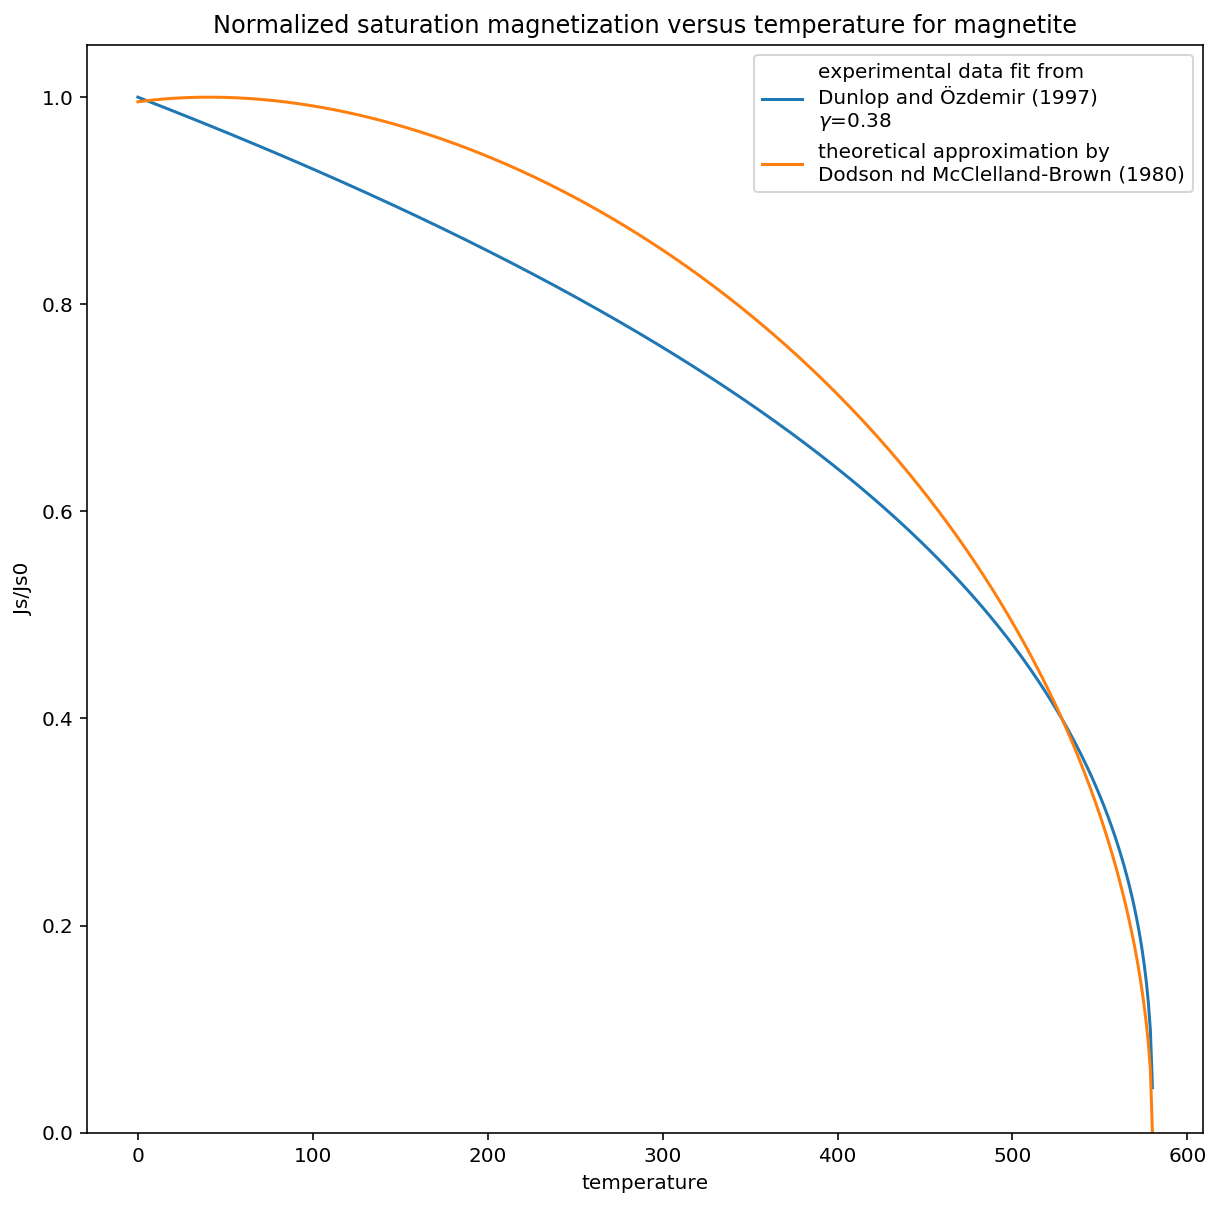

In [7]:
mag_js = 480000 #A/m for magnetite
mag_js_T = []

mag_temps = np.linspace(273, 580+273, 500)

Dodson_mag_T = []

for T in mag_temps:
    mag_js_T.append(mag_js*np.abs((580+273.15-T)/(580+273.15))**0.38)
    Dodson_mag_T.append(Dodson_Js(T, 2))
    
    
plt.figure(figsize=(10,10))
plt.plot(mag_temps-273, mag_js_T/max(mag_js_T), label='experimental data fit from \nDunlop and Özdemir (1997)\n$\gamma$=0.38')
plt.plot(mag_temps-273, Dodson_mag_T/max(Dodson_mag_T), label='theoretical approximation by\nDodson nd McClelland-Brown (1980)')


plt.ylabel('Js/Js0')
plt.xlabel('temperature')
plt.ylim(0., 1.05)
plt.title('Normalized saturation magnetization versus temperature for magnetite')
plt.legend()
plt.show()

### test slope derivative

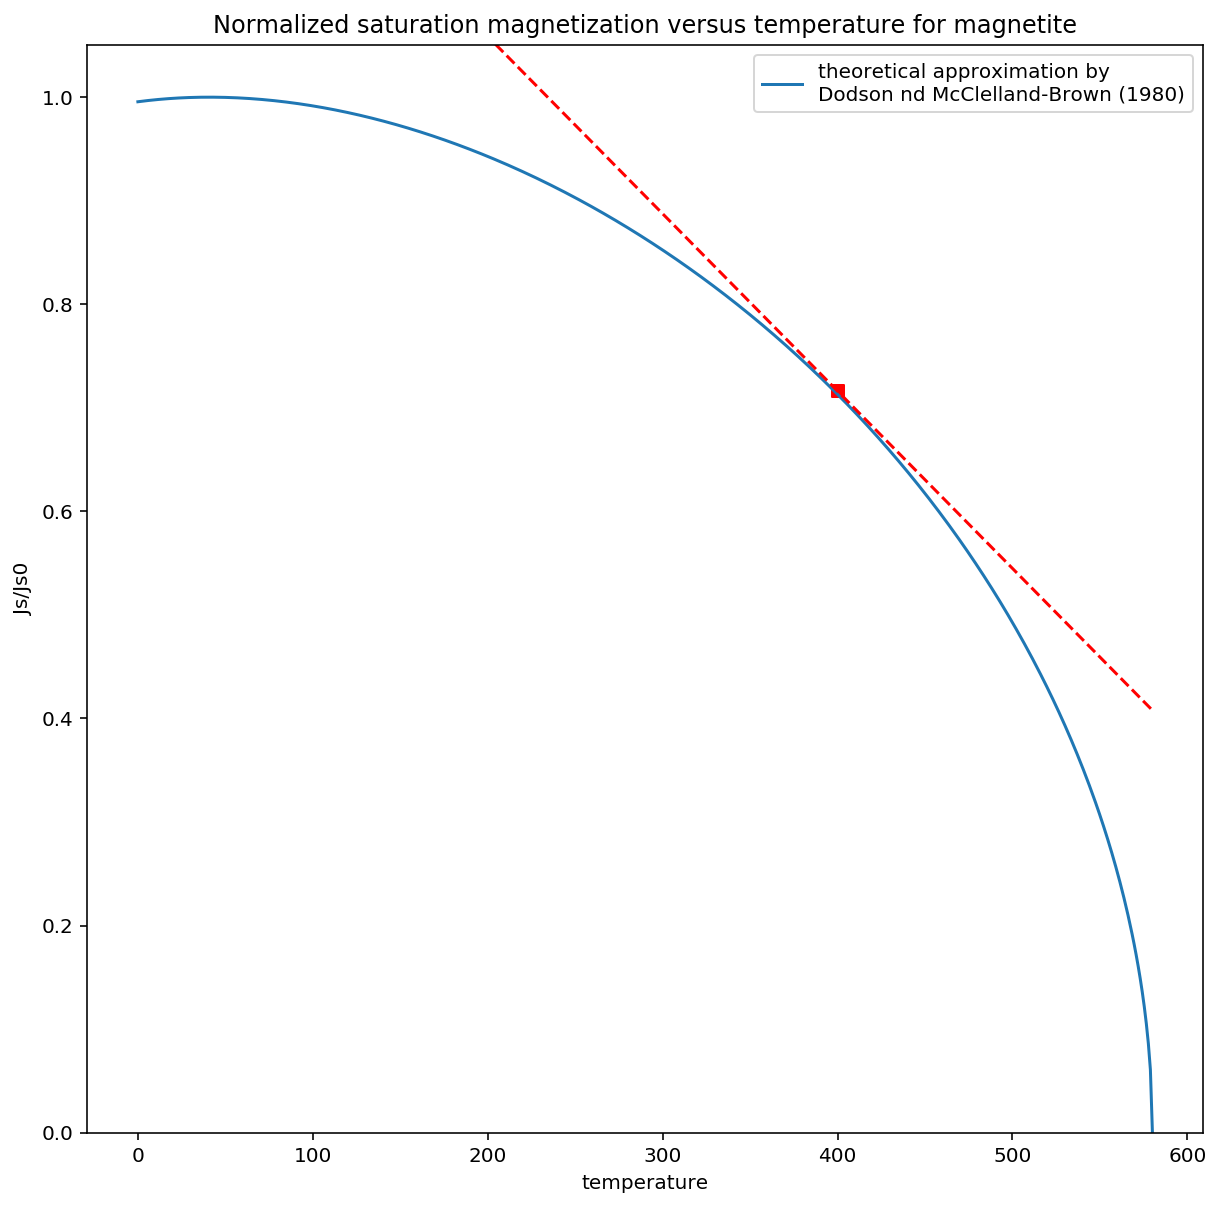

In [8]:
mag_temps = np.linspace(273, 580+273, 500)

Dodson_mag_T = []
    
for T in mag_temps:
    mag_js_T.append(mag_js*np.abs((580+273.15-T)/(580+273.15))**0.38)
    Dodson_mag_T.append(Dodson_Js(T,2))

    
Js400 = Dodson_Js(400+273, 2)

b = Dodson_Js_der(400+273, r=2)
m = Js400-(400+273)*b

y = mag_temps*b+m

    
plt.figure(figsize=(10,10))
plt.plot(mag_temps-273, Dodson_mag_T/max(Dodson_mag_T), label='theoretical approximation by\nDodson nd McClelland-Brown (1980)')

plt.scatter(400, Js400, marker = 's', color = 'r')

plt.plot(mag_temps-273, y, color = 'r', ls='--')
plt.ylabel('Js/Js0')
plt.xlabel('temperature')
plt.ylim(0., 1.05)
plt.title('Normalized saturation magnetization versus temperature for magnetite')
plt.legend()
plt.show()

### Dodson 1980 approximation for hematite js

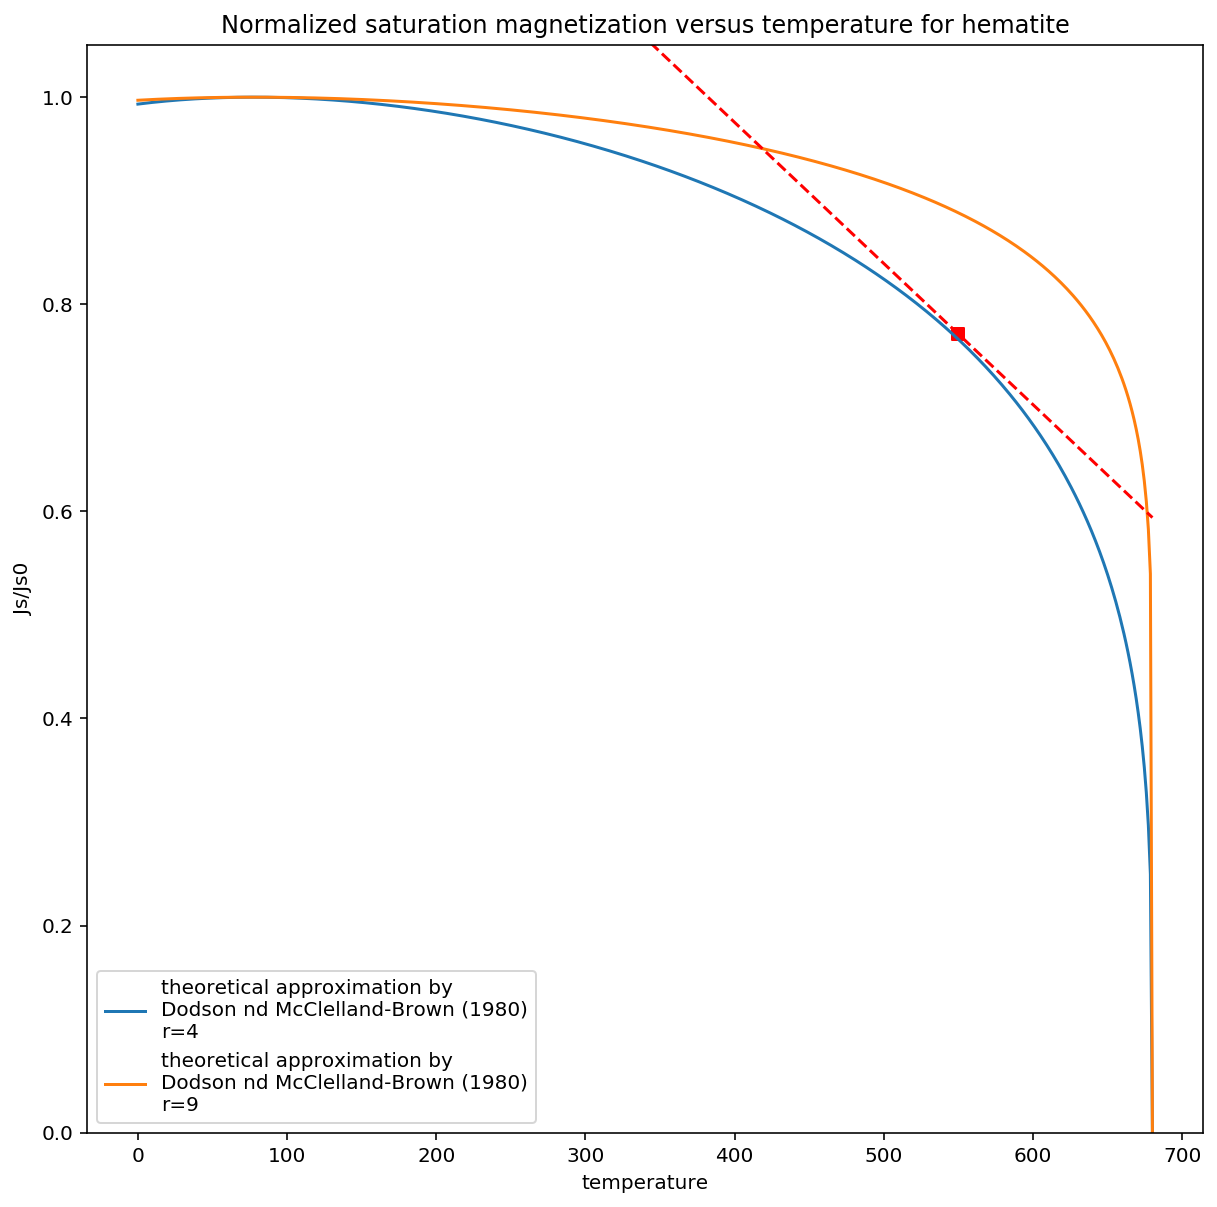

In [9]:
hem_js_T = []

hem_temps = np.linspace(273, 680+273, 500)

Dodson_hem_T_4 = []
Dodson_hem_T_9 = []
    
for T in hem_temps:
    Dodson_hem_T_4.append(Dodson_Js(T, r=4))
    Dodson_hem_T_9.append(Dodson_Js(T, r=9))
# for T in hem_temps:
#     hem_js_T.append(hem_js*np.abs((680+273.15-T)/(580+273.15))**0.38)
Js500 = Dodson_Js(550+273, 4)

b = Dodson_Js_der(550+273, r=4)
m = Js500-(550+273)*b

y = hem_temps*b+m
    
plt.figure(figsize=(10,10))
plt.plot(hem_temps-273, Dodson_hem_T_4/max(Dodson_hem_T_4), label='theoretical approximation by\nDodson nd McClelland-Brown (1980)\nr=4')
plt.plot(hem_temps-273, Dodson_hem_T_9/max(Dodson_hem_T_9), label='theoretical approximation by\nDodson nd McClelland-Brown (1980)\nr=9')
plt.scatter(550, Js500, marker = 's', color = 'r')

plt.plot(hem_temps-273, y, color = 'r', ls='--')

plt.ylabel('Js/Js0')
plt.xlabel('temperature')
plt.ylim(0., 1.05)
plt.title('Normalized saturation magnetization versus temperature for hematite')
plt.legend()
plt.show()

## $T_B$ vs. $\epsilon_0$ for magnetite for cooling rates of 1 C/Myr and 6 C/min

Dodson 1980 Fig. 5, Fig. 7

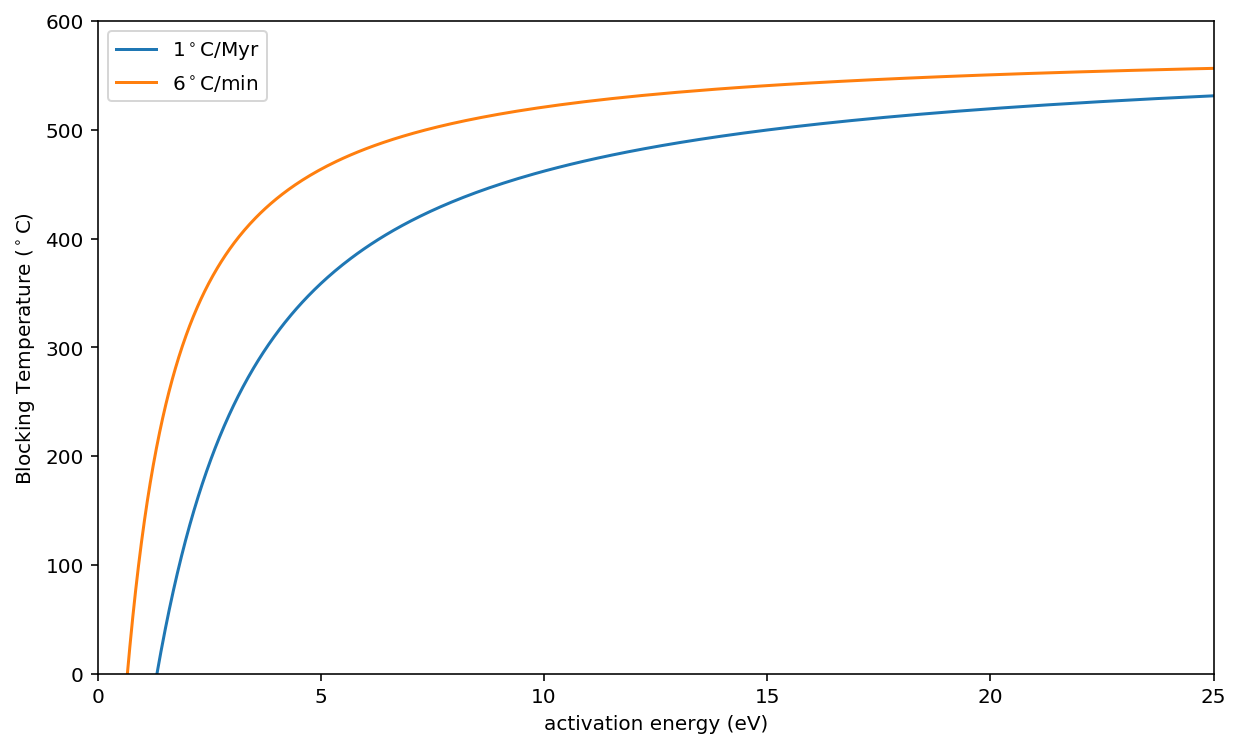

In [10]:
Tb = np.linspace(273, 575+273, 400)

e0s_slow = []
e0s_fast = []
for T in Tb:
    e0s_slow.append(calc_mag_e0(T, cooling_rate=0.3e-13, initial_guess=1.))
    e0s_fast.append(calc_mag_e0(T, cooling_rate=0.1, initial_guess=1.1))
plt.figure(figsize=(10, 6))
plt.plot(e0s_slow, Tb-273, label='1$^\circ$C/Myr')
plt.plot(e0s_fast, Tb-273, label='6$^\circ$C/min')
plt.xlim(0, 25)
plt.ylim(0, 600)
plt.xlabel('activation energy (eV)')
plt.ylabel('Blocking Temperature ($^\circ$C)')
plt.legend()
plt.show()

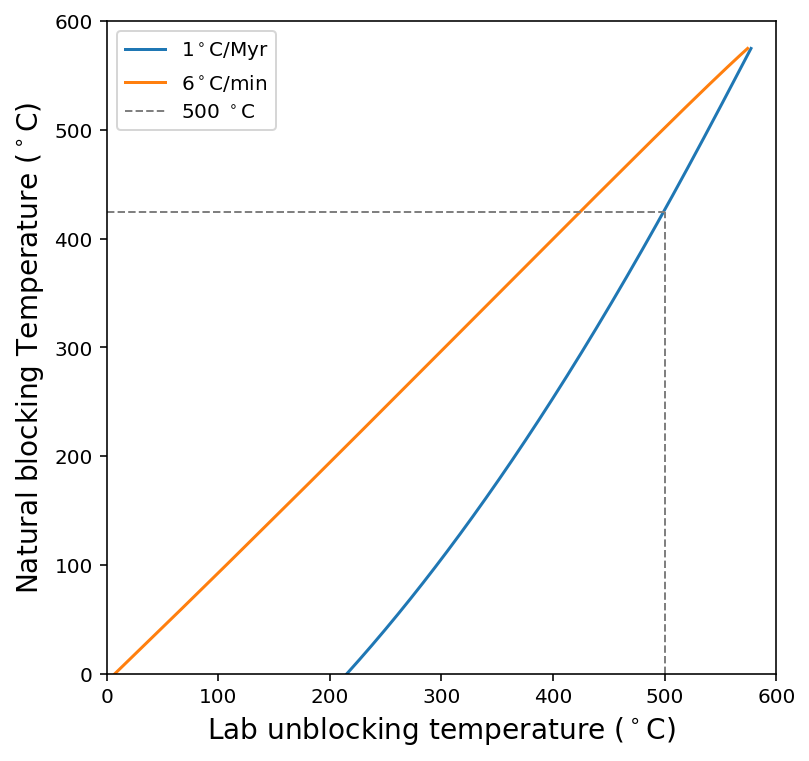

In [36]:
Tb = np.linspace(273, 575+273, 400)
Td_slow = []
Td_fast = []
th = 100 # isothermal heating temperature in lab

for T in Tb:
    js = Dodson_Js(T, r=2)
    e0_slow = calc_mag_e0(T, cooling_rate=0.3e-13, r=2, initial_guess=1.)*1.6e-19
    e0_fast = calc_mag_e0(T, cooling_rate=0.1, r=2, initial_guess=1.)*1.6e-19
    Td_slow.append(calc_Td(e0_slow, js, 2, th)-273)
    Td_fast.append(calc_Td(e0_fast, js, 2, th)-273)

plt.figure(figsize=(6, 6))
plt.plot(Td_slow, Tb-273, label='1$^\circ$C/Myr')
plt.plot(Td_fast, Tb-273, label='6$^\circ$C/min')
plt.plot([500, 500], [0, 425], '--', c='grey', lw=1)
plt.plot([0, 500], [425, 425], '--', c='grey', lw=1, label='500 $^\circ$C')

# plt.plot([525, 525], [0, 450], '--', c='grey', lw=1)
# plt.plot([0, 525], [450, 450], '--', c='grey', lw=1)

plt.xlim(0, 600)
plt.ylim(0, 600)
plt.xlabel('Lab unblocking temperature ($^\circ$C)', fontsize=14)
plt.ylabel('Natural blocking Temperature ($^\circ$C)', fontsize=14)
plt.legend()
plt.show()

## $T_B$ vs. $\epsilon_0$ for hematite for cooling rates of 1 C/Myr and 6 C/min

Dodson 1980 Fig. 6, Fig. 8

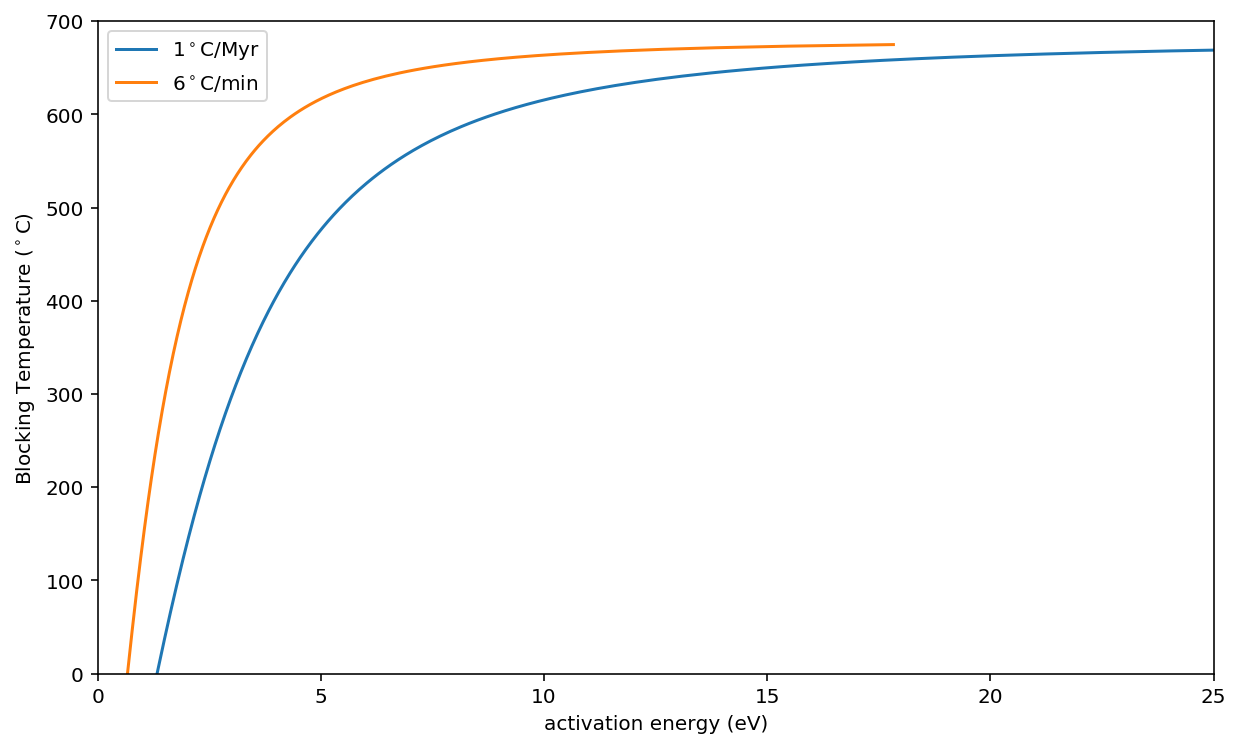

In [12]:
Tb = np.linspace(273, 675+273, 400)
e0s_slow = []
e0s_fast = []
for T in Tb:
    e0s_slow.append(calc_hem_e0(T, cooling_rate=0.3e-13, r=4, initial_guess=1.5))
    e0s_fast.append(calc_hem_e0(T, cooling_rate=0.1, r=4, initial_guess=1.5))
plt.figure(figsize=(10, 6))
plt.plot(e0s_slow, Tb-273, label='1$^\circ$C/Myr')
plt.plot(e0s_fast, Tb-273, label='6$^\circ$C/min')
plt.xlim(0, 25)
plt.ylim(0, 700)
plt.xlabel('activation energy (eV)')
plt.ylabel('Blocking Temperature ($^\circ$C)')
plt.legend()
plt.show()

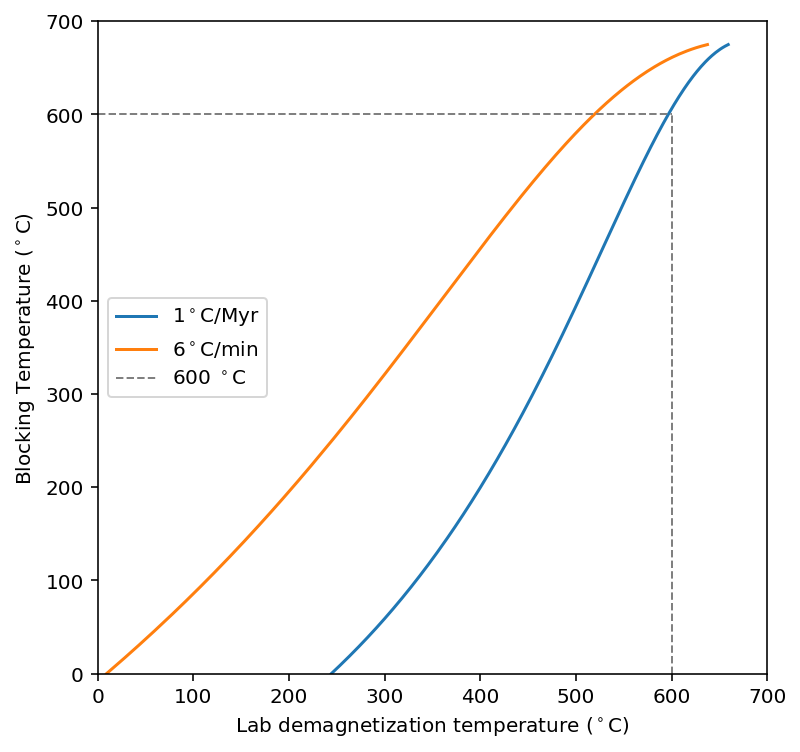

In [13]:
Tb = np.linspace(273, 675+273, 400)
Td_slow = []
Td_fast = []
th = 100 # isothermal heating temperature in lab

for T in Tb:
    js = Dodson_Js(T, r=4)
    e0_slow = calc_hem_e0(T, cooling_rate=0.3e-13, r=4, initial_guess=1.)*1.6e-19
    e0_fast = calc_hem_e0(T, cooling_rate=0.1, r=4, initial_guess=1.)*1.6e-19
    Td_slow.append(calc_Td(e0_slow, js, 4, th)-273)
    Td_fast.append(calc_Td(e0_fast, js, 4, th)-273)

plt.figure(figsize=(6, 6))
plt.plot(Td_slow, Tb-273, label='1$^\circ$C/Myr')
plt.plot(Td_fast, Tb-273, label='6$^\circ$C/min')
plt.xlim(0, 700)
plt.ylim(0, 700)
plt.plot([600, 600], [0, 600], '--', c='grey', lw=1)
plt.plot([0, 600], [600, 600], '--', c='grey', lw=1, label='600 $^\circ$C')


plt.xlabel('Lab demagnetization temperature ($^\circ$C)')
plt.ylabel('Blocking Temperature ($^\circ$C)')
plt.legend()
plt.show()

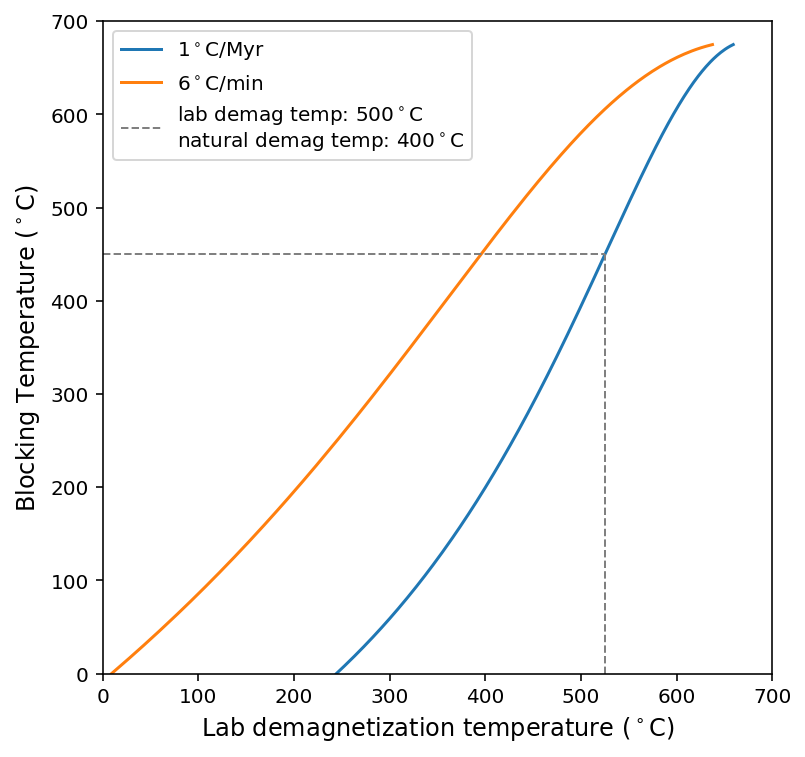

In [17]:
Tb = np.linspace(273, 675+273, 400)
Td_slow = []
Td_fast = []
th = 100 # isothermal heating temperature in lab

for T in Tb:
    js = Dodson_Js(T, r=4)
    e0_slow = calc_hem_e0(T, cooling_rate=0.3e-13, r=4, initial_guess=1.)*1.6e-19
    e0_fast = calc_hem_e0(T, cooling_rate=0.1, r=4, initial_guess=1.)*1.6e-19
    Td_slow.append(calc_Td(e0_slow, js, 4, th)-273)
    Td_fast.append(calc_Td(e0_fast, js, 4, th)-273)

plt.figure(figsize=(6, 6))
plt.plot(Td_slow, Tb-273, label='1$^\circ$C/Myr')
plt.plot(Td_fast, Tb-273, label='6$^\circ$C/min')
plt.xlim(0, 700)
plt.ylim(0, 700)
plt.plot([525, 525], [0, 450], '--', c='grey', lw=1)
plt.plot([0, 525], [450, 450], '--', c='grey', lw=1, label='lab demag temp: 500$^\circ$C\nnatural demag temp: 400$^\circ$C')


plt.xlabel('Lab demagnetization temperature ($^\circ$C)', fontsize=12)
plt.ylabel('Blocking Temperature ($^\circ$C)', fontsize=12)
plt.legend()
# plt.savefig('../figure/hematite_unblocking_slow_cooling.pdf', bbox_inches='tight')
plt.show()